In [ ]:
!pip install deap

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [12]:
num_locations = 10
num_vehicles = 4
depot = (50, 50)

In [13]:
# Generate random locations (excluding depot)
random.seed(42)
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]

In [14]:
# Print Generated Locations
print("Generated Locations (excluding depot):")
for i, loc in enumerate(locations):
    print(f"Location {i}: {loc}")
print(f"Depot: {depot}\n")

Generated Locations (excluding depot):
Location 0: (81, 14)
Location 1: (3, 94)
Location 2: (35, 31)
Location 3: (28, 17)
Location 4: (94, 13)
Location 5: (86, 94)
Location 6: (69, 11)
Location 7: (75, 54)
Location 8: (4, 3)
Location 9: (11, 27)
Depot: (50, 50)



In [15]:
# Define Fitness Function (Multi-Objective)
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -0.1))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [16]:
# Genetic Algorithm Data Structure
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [17]:
def evalVRP(individual):
    """Evaluates the total distance and balance of routes."""
    total_distance = 0
    routes = [[] for _ in range(num_vehicles)]

    # Assign locations to vehicles in a round-robin manner
    for i, location_idx in enumerate(individual):
        routes[i % num_vehicles].append(locations[location_idx])

    # Compute distance for each vehicle
    for route in routes:
        route.insert(0, depot)  # Add depot at start
        route.append(depot)  # Add depot at end
        for k in range(1, len(route)):
            total_distance += np.linalg.norm(np.array(route[k]) - np.array(route[k-1]))

    stddev = np.std([len(route) - 2 for route in routes])  # Balance measure (excluding depots)
    return total_distance, stddev

In [18]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalVRP)

In [19]:
# Running the Genetic Algorithm
pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)

gen	nevals
0  	300   
1  	212   
2  	239   
3  	240   
4  	233   
5  	229   
6  	222   
7  	239   
8  	226   
9  	239   
10 	233   
11 	229   
12 	229   
13 	227   
14 	207   
15 	233   
16 	227   
17 	228   
18 	243   
19 	237   
20 	238   
21 	242   
22 	224   
23 	238   
24 	221   
25 	234   
26 	221   
27 	229   
28 	217   
29 	247   
30 	233   
31 	238   
32 	228   
33 	225   
34 	225   
35 	236   
36 	212   
37 	240   
38 	220   
39 	193   
40 	221   
41 	238   
42 	220   
43 	237   
44 	246   
45 	221   
46 	229   
47 	238   
48 	216   
49 	222   
50 	212   
51 	242   
52 	222   
53 	238   
54 	238   
55 	231   
56 	239   
57 	231   
58 	236   
59 	214   
60 	238   
61 	227   
62 	232   
63 	240   
64 	238   
65 	220   
66 	224   
67 	225   
68 	234   
69 	220   
70 	245   
71 	248   
72 	247   
73 	220   
74 	237   
75 	230   
76 	225   
77 	232   
78 	222   
79 	198   
80 	220   
81 	238   
82 	229   
83 	228   
84 	227   
85 	219   
86 	235   
87 	218   
88 	213   
89 	217   

([[9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 3, 2, 8, 0, 5, 4, 7, 1],
  [7, 6, 9, 2, 4, 1, 5, 0, 3, 8],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 3, 0, 7, 2, 1, 5, 8, 4],
  [5, 6, 7, 2, 8, 0, 3, 1, 9, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 3, 2, 8, 0, 5, 1, 7, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 6, 7, 2, 8, 0, 5, 1, 3, 4],
  [9, 4, 7, 2, 0, 8, 1, 5, 3, 6],
  [9, 6, 7, 2,

In [20]:
# Extract Best Route
best_route = hof[0]
best_distance, _ = evalVRP(best_route)

In [23]:
# Print Optimized Route Order
print("\nOptimal Route Order (Indexes):", best_route)


Optimal Route Order (Indexes): [9, 6, 7, 2, 8, 0, 5, 1, 3, 4]


In [24]:
print("\nOptimized Route with Coordinates:")
for idx in best_route:
    print(f"Location {idx}: {locations[idx]}")


Optimized Route with Coordinates:
Location 9: (11, 27)
Location 6: (69, 11)
Location 7: (75, 54)
Location 2: (35, 31)
Location 8: (4, 3)
Location 0: (81, 14)
Location 5: (86, 94)
Location 1: (3, 94)
Location 3: (28, 17)
Location 4: (94, 13)


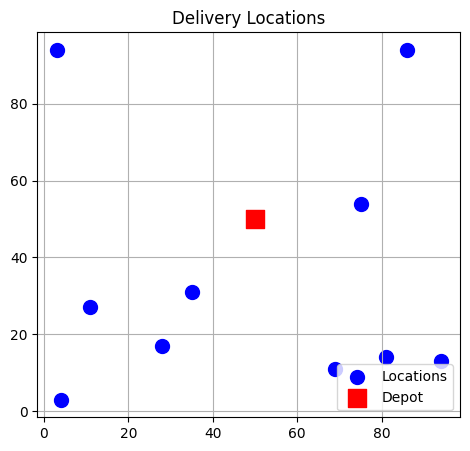

In [27]:
# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Locations
plt.subplot(1, 2, 1)
plt.scatter(*zip(*locations), c='blue', label='Locations', s=100)
plt.scatter(*depot, c='red', marker='s', label='Depot', s=150)
plt.title("Delivery Locations")
plt.legend()
plt.grid()

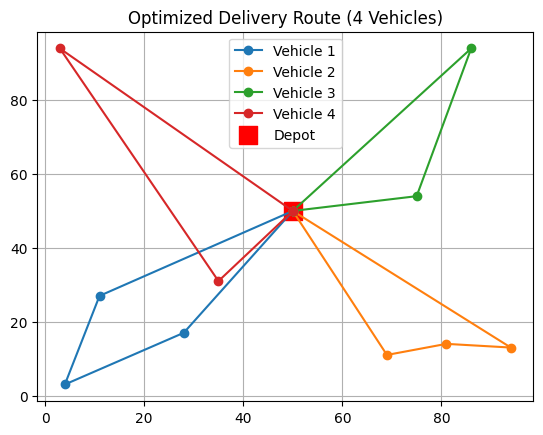


Final Best Distance: 546.9056237558888


In [31]:
# Plot 2: Optimized Route
# plt.subplot(1, 2, 2)

# Assign locations to vehicles in a round-robin manner again for visualization
routes = [[] for _ in range(num_vehicles)]
for i, location_idx in enumerate(best_route):
    routes[i % num_vehicles].append(locations[location_idx])

# Plot each vehicle's route
for i in range(num_vehicles):
    route = [depot] + routes[i] + [depot]
    route_x, route_y = zip(*route)
    plt.plot(route_x, route_y, marker='o', linestyle='-', label=f'Vehicle {i+1}')

plt.scatter(*depot, c='red', marker='s', label='Depot', s=150)
plt.title("Optimized Delivery Route (4 Vehicles)")
plt.legend()
plt.grid()

plt.show()

print("\nFinal Best Distance:", best_distance)